<a href="https://colab.research.google.com/github/helsy2202/ML/blob/master/day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score,classification_report
from sklearn.model_selection import train_test_split

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
iris=pd.read_csv('/content/Iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# **Preprocessing**

In [ ]:
IrIs=iris

In [ ]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
encoder=OrdinalEncoder()
Iris=encoder.fit_transform(iris[['Species']])
Iris

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [ ]:
iris['Species']=Iris
iris.drop('species',axis=1)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0.0
1,2,4.9,3.0,1.4,0.2,0.0
2,3,4.7,3.2,1.3,0.2,0.0
3,4,4.6,3.1,1.5,0.2,0.0
4,5,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2.0
146,147,6.3,2.5,5.0,1.9,2.0
147,148,6.5,3.0,5.2,2.0,2.0
148,149,6.2,3.4,5.4,2.3,2.0


# **Visualization**

<Axes: xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

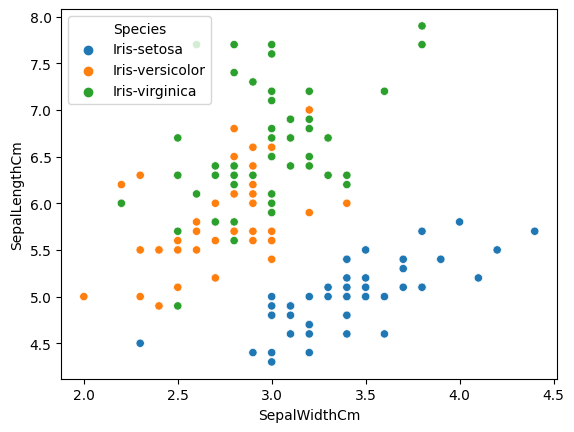

In [ ]:
sns.scatterplot(data=IrIs[:],x='SepalWidthCm',y='SepalLengthCm',hue="Species")

<Axes: xlabel='PetalWidthCm', ylabel='PetalLengthCm'>

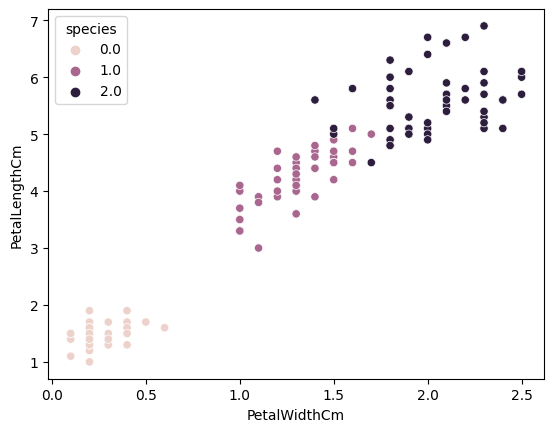

In [ ]:
sns.scatterplot(data=IrIs[:],x='PetalWidthCm',y='PetalLengthCm',hue="species")

# **kmeans**

In [ ]:
Test,Train=train_test_split(iris,test_size=0.10,random_state=10)

In [ ]:
k_means=KMeans(n_clusters=3)
k_means.fit(Test)
res=k_means.predict(Train)
print(res)
kmeans_labels = k_means.labels_
kmeans_score = silhouette_score(Test, kmeans_labels)
print('\n\nK-Means Silhouette Score:', kmeans_score)
print()
print()

[2 0 1 2 1 2 2 2 1 2 2 0 2 1 1]


K-Means Silhouette Score: 0.5899864630474446




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# **Heirarchial Clustering**

In [ ]:
Z = linkage(iris, method='centroid')

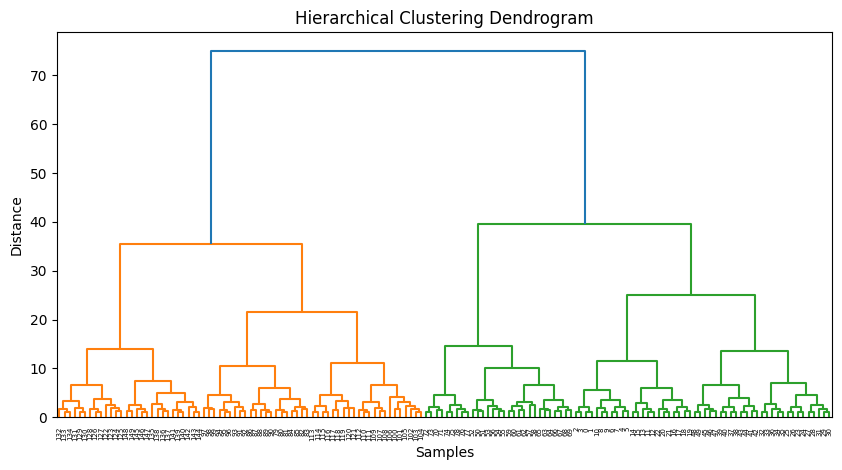

In [ ]:
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# **PCA**

In [ ]:
pca = PCA(n_components=2)
pca_iris = pca.fit_transform(iris)
pca_iris

array([[ 7.45595259e+01,  5.53725715e-01],
       [ 7.35614578e+01,  4.25493373e-01],
       [ 7.25697487e+01,  2.03291037e-01],
       [ 7.15647358e+01,  2.71110632e-01],
       [ 7.05660236e+01,  3.19959878e-01],
       [ 6.95490279e+01,  7.44027465e-01],
       [ 6.85714807e+01,  7.37538957e-02],
       [ 6.75651992e+01,  2.64280064e-01],
       [ 6.65761759e+01, -1.28033807e-01],
       [ 6.55693221e+01,  1.04490770e-01],
       [ 6.45644787e+01,  3.03802926e-01],
       [ 6.35690829e+01,  6.55425835e-02],
       [ 6.25774255e+01, -1.57830499e-01],
       [ 6.15961854e+01, -6.72789009e-01],
       [ 6.05756908e+01,  5.95383544e-02],
       [ 5.95659191e+01,  2.50316962e-01],
       [ 5.85763823e+01, -8.24389317e-02],
       [ 5.75780727e+01, -2.07080656e-01],
       [ 5.65615049e+01,  2.55051500e-01],
       [ 5.55780474e+01, -2.26996558e-01],
       [ 5.45679621e+01,  4.91167802e-03],
       [ 5.35784393e+01, -2.90383582e-01],
       [ 5.26071271e+01, -1.01591739e+00],
       [ 5.

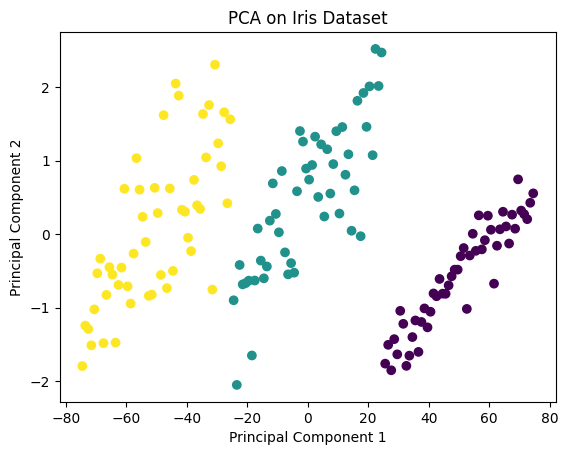

In [ ]:
plt.scatter(pca_iris[:, 0], pca_iris[:, 1], c=iris['species'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Iris Dataset')
plt.show()